In [53]:
import os
import pandas as pd 

DATA_PATH = "./XRays.xlsx"

assert os.path.exists(DATA_PATH), f"Check the path {DATA_PATH}"

df = pd.read_excel(DATA_PATH)

In [54]:
pd.concat([pd.Series(data=np.ones(len(df)), index=pd.to_datetime(df['dtBegin'])),
           -pd.Series(data=np.ones(len(df)), index=pd.to_datetime(df['dtCompleted']))]).resample('30Min').sum().max()

14.0

In [7]:
df.head(5)

,stMRN,dtArrive,dtBegin,dtCompleted
0,12222732,2016-04-04 08:00:21,2016-04-04 08:04:56,2016-04-04 08:11:52
1,13510077,2016-04-04 08:21:54,2016-04-04 08:26:40,2016-04-04 08:39:12
2,11183882,2016-04-04 08:33:38,2016-04-04 08:44:53,2016-04-04 08:44:58
3,12949996,2016-04-04 08:38:16,2016-04-04 08:41:27,2016-04-04 08:47:34
4,11566221,2016-04-04 08:26:10,2016-04-04 08:33:21,2016-04-04 08:53:06


In [10]:
df.stMRN.nunique(), df.shape

(13330, (21873, 4))

In [29]:
df['WaitingTime'] = (df['dtBegin'] - df['dtArrive']).dt.total_seconds() / 60

In [31]:
pa

43746

In [32]:
timestamps = []

for _, row in df.iterrows():
    timestamps.append((row['dtArrive'], 1))       # Arrival (+1)
    timestamps.append((row['dtCompleted'], -1))    # Completion (-1)

timestamps.sort()

current_patients = 0
patients_in_hospital = []

for timestamp in timestamps:
    current_patients += timestamp[1]
    patients_in_hospital.append(current_patients)

timestamp_to_patients = dict(zip([ts[0] for ts in timestamps], patients_in_hospital))

df['CurrentPatients'] = df['dtArrive'].map(timestamp_to_patients)

In [37]:
df

,stMRN,dtArrive,dtBegin,dtCompleted,WaitingTime,CurrentPatients
0,12222732,2016-04-04 08:00:21,2016-04-04 08:04:56,2016-04-04 08:11:52,4.583333,1
1,13510077,2016-04-04 08:21:54,2016-04-04 08:26:40,2016-04-04 08:39:12,4.766667,1
2,11183882,2016-04-04 08:33:38,2016-04-04 08:44:53,2016-04-04 08:44:58,11.250000,3
3,12949996,2016-04-04 08:38:16,2016-04-04 08:41:27,2016-04-04 08:47:34,3.183333,4
4,11566221,2016-04-04 08:26:10,2016-04-04 08:33:21,2016-04-04 08:53:06,7.183333,2
...,...,...,...,...,...,...
21868,9672860,2016-11-15 11:02:54,2016-11-15 11:23:25,2016-11-15 11:43:01,20.516667,10
21869,12075344,2016-11-15 13:50:12,2016-11-15 14:01:03,2016-11-15 14:04:54,10.850000,1
21870,12490506,2016-11-15 15:43:48,2016-11-15 15:59:21,2016-11-15 16:19:31,15.550000,2
21871,12490506,2016-11-15 15:43:27,2016-11-15 15:59:01,2016-11-15 16:19:42,15.566667,1


In [42]:
df[df['WaitingTime'] <= 0] = 0

In [46]:
df[df['CurrentPatients'] == df['CurrentPatients'].max()]

,stMRN,dtArrive,dtBegin,dtCompleted,WaitingTime,CurrentPatients
18380,11726583,2016-10-13 11:07:48,2016-10-13 11:19:46,2016-10-13 11:32:07,11.966667,44
18381,11726583,2016-10-13 11:07:28,2016-10-13 11:20:06,2016-10-13 11:32:17,12.633333,44
18408,11073307,2016-10-13 11:25:43,2016-10-13 12:35:11,2016-10-13 12:35:27,69.466667,44


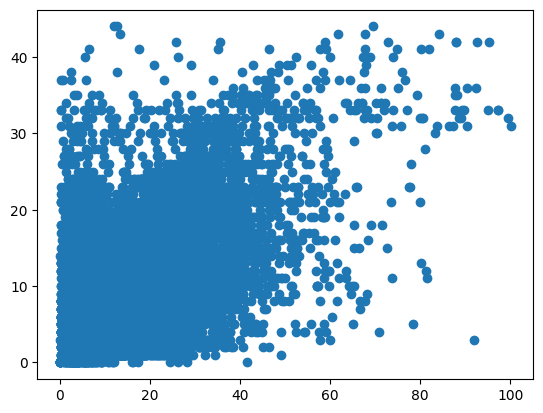

In [43]:
import matplotlib.pyplot as plt

plt.scatter(df['WaitingTime'], df['CurrentPatients'])

In [14]:
count = 0
max_count = 0
for t, tip, id_ in timestamps:
    if tip == 'start':
        count += 1
        max_count = max(max_count, count)
    elif tip == 'end':
        count = 0


In [48]:
timestamps = []
timestamps.extend([(pd.to_datetime(row['dtBegin']), 'start', row['stMRN']) for _, row in df.iterrows()])
timestamps.extend([(pd.to_datetime(row['dtCompleted']), 'end', row['stMRN']) for _, row in df.iterrows()])

timestamps.sort()

max_rooms = 0
current_rooms = 0
current_patients = 0
max_patients = 0

for timestamp, event, stmrn in timestamps:
    if event == 'start':
        current_rooms += 1
        current_patients += 1
        max_rooms = max(max_rooms, current_rooms)
        max_patients = max(max_patients, current_patients)
    else:
        current_patients -= 1
        current_rooms = 0

xray_rooms = max_rooms
print("Number of X-ray rooms in the facility:", xray_rooms)

Number of X-ray rooms in the facility: 11


In [55]:
max_patients

21